In [1]:
import pandas as pd
import os
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import matplotlib

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
import pickle

In [3]:
import ASTRA_plots_utils
import plotting_utils
import predictions_evaluations
import utils

In [4]:
fleet_size = 14000
path = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct/fleet_{fleet_size}'
path_copy = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct_copy/fleet_{fleet_size}'

In [5]:
#last_iter = 60
#methods = ['markov','msa02','mw5']

In [6]:
data_global = {}
for m in ['markov']:
    data_global[m] = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"global"),
        last_iter=89
    )

100%|██████████| 90/90 [02:45<00:00,  1.84s/it]


In [7]:
data_fixed = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"fixed"),
        last_iter=100
    )

100%|██████████| 101/101 [02:27<00:00,  1.46s/it]


In [8]:
data_dynamic_CN = {}
data_dynamic_CN['markov'] = {}
data_dynamic_CN['msa02'] = {}
data_dynamic_CN['mw5'] = {}

data_dynamic_CN['markov'][10] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k10"),
                last_iter=88
                )
data_dynamic_CN['markov'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k25"),
                last_iter=97
                )
data_dynamic_CN['markov'][50] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k50"),
                last_iter=67
                )
data_dynamic_CN['markov'][100] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", "k100"),
                last_iter=90
                )

data_dynamic_CN['msa02'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", 'msa02', "k25_v2"),
                last_iter=84
                )
data_dynamic_CN['mw5'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path_copy,"dynamic_CN", 'mw5', "k25"),
                last_iter=95
                )

100%|██████████| 96/96 [03:05<00:00,  1.93s/it]


In [9]:
data_hex_500 = {}
data_hex_500['markov'] = ASTRA_plots_utils.read_output(
        os.path.join(path,"hex","500_v2"),
        last_iter=85
        )

100%|██████████| 86/86 [02:39<00:00,  1.86s/it]


In [10]:
data_square_850 = {}
data_square_850['markov'] = ASTRA_plots_utils.read_output(
        os.path.join(path_copy,"square","850"),
        last_iter=93
        )

100%|██████████| 94/94 [02:58<00:00,  1.90s/it]


In [11]:
data_dynamic_FD = {}
data_dynamic_FD['markov'] = {}
data_dynamic_FD['markov'][500] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_FD", '500'),
            last_iter=87
            )

100%|██████████| 88/88 [02:44<00:00,  1.87s/it]


In [12]:
data_dynamic_PN = {}
data_dynamic_PN['markov'] = {}
data_dynamic_PN['markov'][0.1] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.1_km1000"),
            last_iter=93
            )
data_dynamic_PN['markov'][0.2] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.2_km1000"),
            last_iter=75
            )
data_dynamic_PN['markov'][0.3] = ASTRA_plots_utils.read_output(
            os.path.join(path_copy,"dynamic_PN", f"p0.3_km1000"),
            last_iter=95
            )

100%|██████████| 96/96 [03:02<00:00,  1.91s/it]


In [13]:
data = {}
data['global'] = data_global
data['fixed'] = data_fixed
data['dynamic_CN'] = data_dynamic_CN
data['hex_500'] = data_hex_500
data['square_850'] = data_square_850
data['dynamic_PN'] = data_dynamic_PN
data['dynamic_FD'] = data_dynamic_FD


In [14]:
write=False
if write:
    # this is just to save it in case scratch is deleted
    with open(os.path.join(path_copy, 'data_dict.pkl'), 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
read=False
if read:
    with open(os.path.join(path_copy, 'data_dict.pkl'), 'rb') as handle:
        data = pickle.load(handle)

In [18]:
compare_methods = [
    ("Fixed feedback", data['fixed'], 100),
    ("Global feedback", data['global']['markov'], 89),
    ("Square 850m", data['square_850']['markov'], 93),
    ("Hex 500m", data['hex_500']['markov'], 85),
    ("KNN-CN 10", data['dynamic_CN']['markov'][10], 88),
    ("KNN-CN 25", data['dynamic_CN']['markov'][25], 97),
    ("KNN-CN 50", data['dynamic_CN']['markov'][50], 67),
    ("KNN-CN 100", data['dynamic_CN']['markov'][100], 90),
    ("KNN-PN 0.1, 1000", data['dynamic_PN']['markov'][0.1], 93),
    ("KNN-PN 0.2, 1000", data['dynamic_PN']['markov'][0.2], 75),
    ("KNN-PN 0.3, 1000", data['dynamic_PN']['markov'][0.3], 95),
    ("FD 500", data['dynamic_FD']['markov'][500], 87)
]

In [19]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=True)
t

Fixed feedback (it.100)  \
Number of rides                                            461482   
Wait time (min)                   Mean                    3.31537   
                                  Median                  2.06667   
                                  Std                     4.28094   
                                  75-perc                 4.16667   
                                  99-perc                 19.6532   
                                  Max                     128.717   
Travel time (min)                 Mean                    20.6394   
                                  Median                  15.8167   
                                  Std                     17.7393   
                                  75-perc                   28.05   
                                  99-perc                 83.4865   
                                  Max                     239.567   
Mean direct distance (km)                                 4.28623   
Average detour factor (time wise)                         1.44107   
Total execution time                             11 days 22:58:45   

                                          Global feedback (it.89)  \
Number of rides                                            646196   
Wait time (min)                   Mean                    4.23763   
                                  Median                  2.56667   
                                  Std                      5.4426   
                                  75-perc                     5.2   
                                  99-perc                 25.8333   
                                  Max                     184.767   
Travel time (min)                 Mean                    21.0268   
                                  Median                     15.6   
                                  Std                     19.3781   
                                  75-perc                    28.4   
                                  99-perc                 88.1175   
                                  Max                       338.4   
Mean direct distance (km)                                 4.10695   
Average detour factor (time wise)                         1.49577   
Total execution time                             14 days 05:12:21   

                                          Square 850m (it.93)  \
Number of rides                                        662826   
Wait time (min)                   Mean                3.41214   
                                  Median              2.31667   
                                  Std                 3.77237   
                                  75-perc             4.38333   
                                  99-perc             17.4667   
                                  Max                  151.15   
Travel time (min)                 Mean                 19.924   
                                  Median              14.9833   
                                  Std                 17.9974   
                                  75-perc             27.0667   
                                  99-perc             81.7667   
                                  Max                  303.05   
Mean direct distance (km)                             3.99898   
Average detour factor (time wise)                     1.47058   
Total execution time                         14 days 23:36:49   

                                           Hex 500m (it.85) KNN-CN 10 (it.88)  \
Number of rides                                      654552            658442   
Wait time (min)                   Mean              3.44096           3.50461   
                                  Median            2.33333              2.35   
                                  Std                3.7442           3.99026   
                                  75-perc              4.45           4.48333   
                                  99-perc           17.4833           18.4333   
                     

In [20]:
compare_methods_smoothing = [
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 97-1),
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 97),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 84-1),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 84),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 95-1),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 95)
]

In [21]:
t = plotting_utils.get_multiple_stats_table(compare_methods_smoothing, add_iter=True)
t

KNN-CN 25 Markov (it.96)  \
Number of rides                                             666280   
Wait time (min)                   Mean                     3.44877   
                                  Median                   2.33333   
                                  Std                      3.79577   
                                  75-perc                     4.45   
                                  99-perc                    17.65   
                                  Max                      116.533   
Travel time (min)                 Mean                     20.1125   
                                  Median                   15.0333   
                                  Std                      18.2536   
                                  75-perc                     27.3   
                                  99-perc                    83.85   
                                  Max                       294.85   
Mean direct distance (km)                                  4.00189   
Average detour factor (time wise)                          1.47807   
Total execution time                              14 days 22:32:32   

                                          KNN-CN 25 Markov (it.97)  \
Number of rides                                             666961   
Wait time (min)                   Mean                     3.49126   
                                  Median                   2.33333   
                                  Std                      4.01997   
                                  75-perc                  4.43333   
                                  99-perc                     18.6   
                                  Max                       123.85   
Travel time (min)                 Mean                     20.2997   
                                  Median                   15.0333   
                                  Std                      18.6871   
                                  75-perc                    27.35   
                                  99-perc                    87.99   
                                  Max                      303.267   
Mean direct distance (km)                                  4.00573   
Average detour factor (time wise)                          1.49127   
Total execution time                              14 days 22:32:32   

                                          KNN-CN 25 MSA=0.2 (it.83)  \
Number of rides                                              648438   
Wait time (min)                   Mean                      3.40114   
                                  Median                    2.33333   
                                  Std                       3.65529   
                                  75-perc                   4.41667   
                                  99-perc                   16.9833   
                                  Max                         121.3   
Travel time (min)                 Mean                      20.1361   
                                  Median                    15.0333   
                                  Std                       18.0787   
                                  75-perc                      27.4   
                                  99-perc                   82.8938   
                                  Max                       290.317   
Mean direct distance (km)                                   3.97033   
Average detour factor (time wise)                           1.49446   
Total execution time                               12 days 08:01:44   

                                          KNN-CN 25 MSA=0.2 (it.84)  \
Number of rides                                              649593   
Wait time (min)                   Mean                      3.44155   
                                  Median                    2.33333   
                                  Std                       3.80768   
                                  75-perc                      4.45   
                          

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.100),23500,-6.591862,4.572044,-9.983333,-9.266667,-7.916667,-5.750000,0.600000,10.950167,111.416667,6.000000,8.000000,9.416667,9.483333,10.950167,3.190560,64.355339,8.022178,7.360412,94.314894
Global feedback (it.89),33492,0.059919,5.378917,-4.206348,-3.056348,-1.623015,1.060319,9.693652,21.426985,78.093652,1.489681,2.639681,3.706348,9.693652,21.426985,4.202359,28.935479,5.379171,3.357924,68.090887
Square 850m (it.93),34278,-0.009105,3.464833,-26.415686,-1.863233,-0.684724,1.064250,5.766957,11.703123,95.958553,0.811290,1.651307,2.743431,6.361111,11.939439,2.644565,12.004803,3.464795,2.238543,61.765564
Hex 500m (it.85),33861,0.056909,3.420113,-17.423091,-1.873077,-0.641667,1.121212,6.055556,12.209232,72.794444,0.807143,1.662179,2.779487,6.398639,12.388931,2.567988,11.700066,3.420536,2.259536,61.079118
KNN-CN 10 (it.88),34097,0.153392,3.657134,-23.531667,-1.757090,-0.553333,1.219822,6.138333,13.365803,87.905979,0.769786,1.590745,2.806220,6.658898,13.688430,2.846737,13.397769,3.660296,2.300839,59.973018
KNN-CN 25 (it.97),33688,0.113018,3.641318,-21.637551,-1.799988,-0.638335,1.178204,6.083802,12.864929,72.303333,0.812285,1.633417,2.764124,6.621714,13.176950,2.828747,13.271574,3.643017,2.295597,61.125623
KNN-CN 50 (it.67),33440,0.006239,3.511016,-22.205333,-1.986137,-0.811963,1.142533,6.190312,12.042559,70.450947,0.914526,1.786909,2.886457,6.513970,12.294984,2.600061,12.326903,3.510969,2.359361,62.757177
KNN-CN 100 (it.90),34562,-0.000351,3.467804,-20.332833,-1.918754,-0.801757,1.050322,5.925097,12.230331,98.644132,0.887661,1.710109,2.739450,6.283082,12.363250,2.617199,12.025317,3.467754,2.274992,62.968000
"KNN-PN 0.1, 1000 (it.93)",34113,0.025308,3.601077,-14.004729,-1.946546,-0.826897,1.048319,6.178853,12.489342,94.789217,0.898799,1.766122,2.755201,6.527225,12.537461,2.748281,12.968019,3.601114,2.327008,63.412775
"KNN-PN 0.2, 1000 (it.75)",33630,0.028308,3.857359,-12.143822,-2.050870,-0.878068,1.102816,6.299577,13.212560,72.705661,0.952363,1.845515,2.861365,6.543624,13.212560,3.002467,14.879577,3.857405,2.421728,63.705025


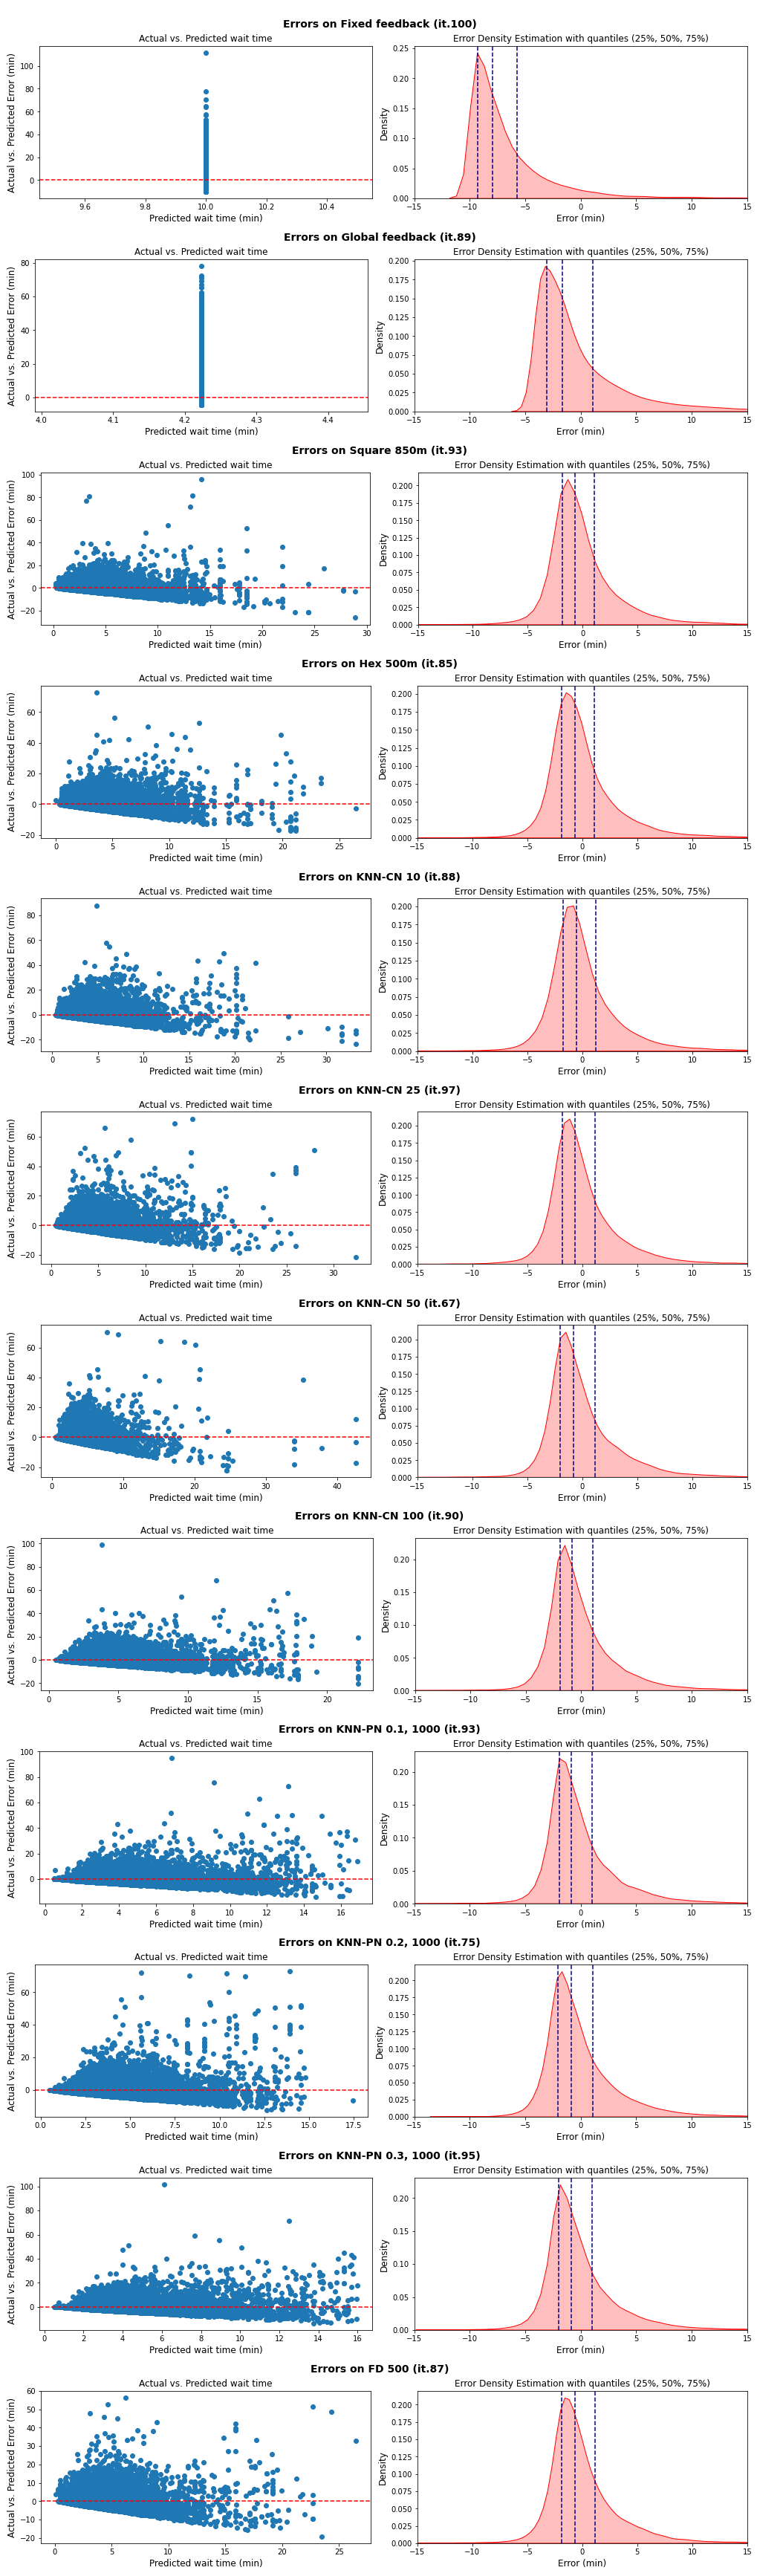

In [22]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True
)

In [23]:
t = table_compare_methods.copy(deep=True)
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])
t

,count,mean,std,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.100),23500,-6.591862,4.572044,6.000000,8.000000,9.416667,9.483333,10.950167,3.190560,8.022178,7.360412,94.314894
Global feedback (it.89),33492,0.059919,5.378917,1.489681,2.639681,3.706348,9.693652,21.426985,4.202359,5.379171,3.357924,68.090887
Square 850m (it.93),34278,-0.009105,3.464833,0.811290,1.651307,2.743431,6.361111,11.939439,2.644565,3.464795,2.238543,61.765564
Hex 500m (it.85),33861,0.056909,3.420113,0.807143,1.662179,2.779487,6.398639,12.388931,2.567988,3.420536,2.259536,61.079118
KNN-CN 10 (it.88),34097,0.153392,3.657134,0.769786,1.590745,2.806220,6.658898,13.688430,2.846737,3.660296,2.300839,59.973018
KNN-CN 25 (it.97),33688,0.113018,3.641318,0.812285,1.633417,2.764124,6.621714,13.176950,2.828747,3.643017,2.295597,61.125623
KNN-CN 50 (it.67),33440,0.006239,3.511016,0.914526,1.786909,2.886457,6.513970,12.294984,2.600061,3.510969,2.359361,62.757177
KNN-CN 100 (it.90),34562,-0.000351,3.467804,0.887661,1.710109,2.739450,6.283082,12.363250,2.617199,3.467754,2.274992,62.968000
"KNN-PN 0.1, 1000 (it.93)",34113,0.025308,3.601077,0.898799,1.766122,2.755201,6.527225,12.537461,2.748281,3.601114,2.327008,63.412775
"KNN-PN 0.2, 1000 (it.75)",33630,0.028308,3.857359,0.952363,1.845515,2.861365,6.543624,13.212560,3.002467,3.857405,2.421728,63.705025


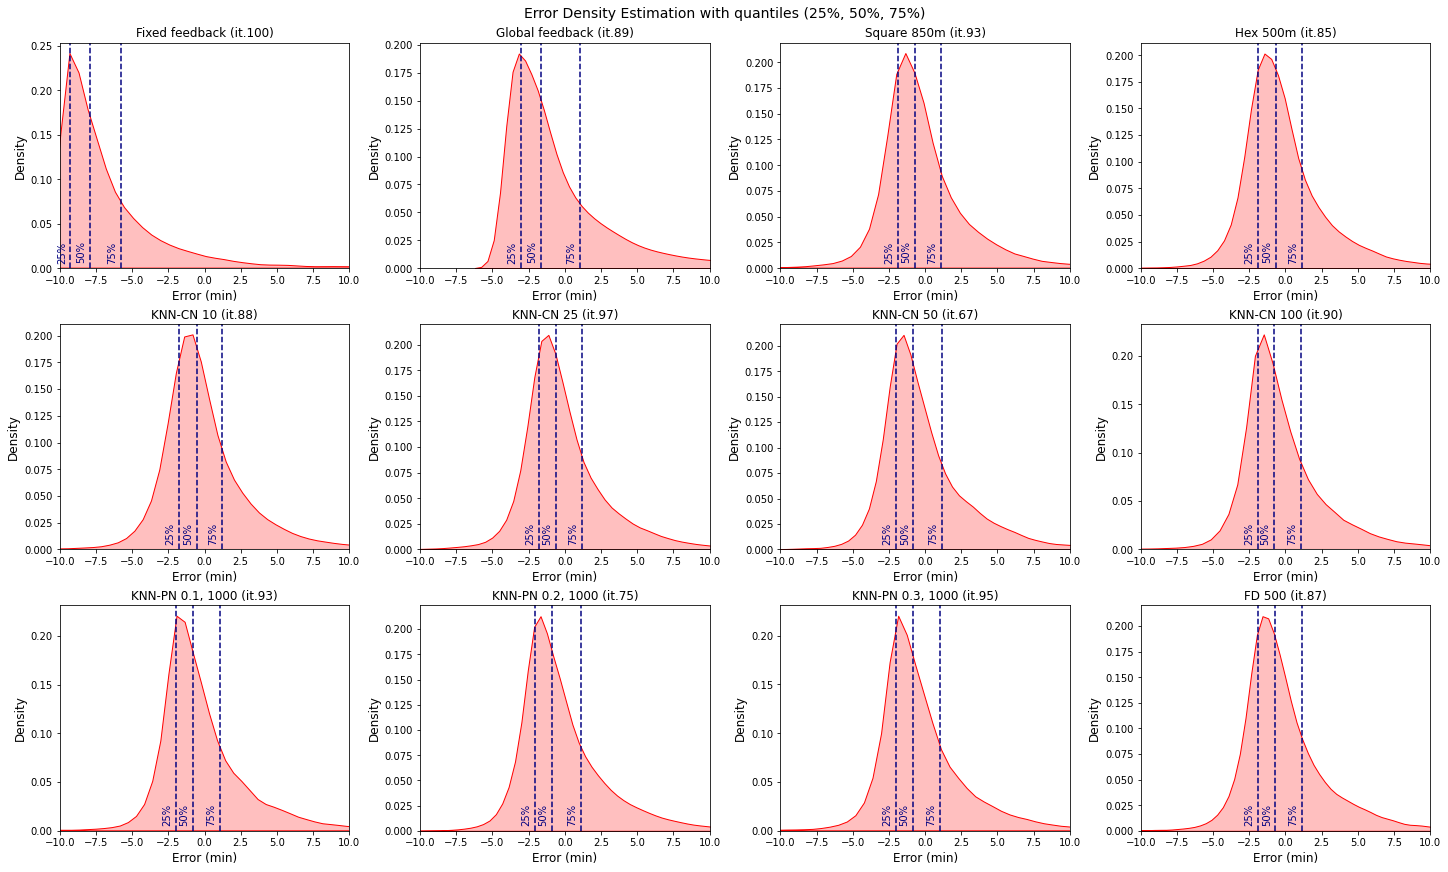

In [24]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods, 'waitTime', 3,4, kde_plot_limit=10, add_iteration_to_title=True)

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
KNN-CN 25 Markov (it.96),34483,0.013121,3.408927,-20.584667,-1.832899,-0.695002,1.096868,5.912528,12.268520,48.452053,0.826873,1.633663,2.746686,6.393607,12.582159,2.557152,11.620615,3.408902,2.254238,62.134965
KNN-CN 25 Markov (it.97),33688,0.113018,3.641318,-21.637551,-1.799988,-0.638335,1.178204,6.083802,12.864929,72.303333,0.812285,1.633417,2.764124,6.621714,13.176950,2.828747,13.271574,3.643017,2.295597,61.125623
KNN-CN 25 MSA=0.2 (it.83),34170,-0.067752,3.276144,-19.101549,-1.935346,-0.767013,1.037246,5.817637,11.503723,49.292510,0.853352,1.703865,2.782266,6.243887,11.741673,2.385663,10.737397,3.276797,2.246332,63.359672
KNN-CN 25 MSA=0.2 (it.84),33548,0.038615,3.493713,-23.509766,-1.916245,-0.728494,1.129308,6.062993,12.876494,58.608106,0.856506,1.716401,2.793696,6.389884,13.157423,2.626334,12.207156,3.493874,2.304241,62.528318
KNN-CN 25 MW=5 (it.94),34044,0.156665,3.898228,-23.853912,-1.848515,-0.677612,1.157129,6.221246,13.574705,93.779826,0.835015,1.668887,2.739141,6.587176,13.702719,3.127180,15.220281,3.901318,2.332601,61.828810
KNN-CN 25 MW=5 (it.95),34247,0.038865,3.517448,-17.809296,-1.854488,-0.697189,1.054818,5.949671,11.880969,113.895685,0.812955,1.637191,2.697604,6.358714,11.990463,2.719929,12.373593,3.517612,2.230601,62.452186


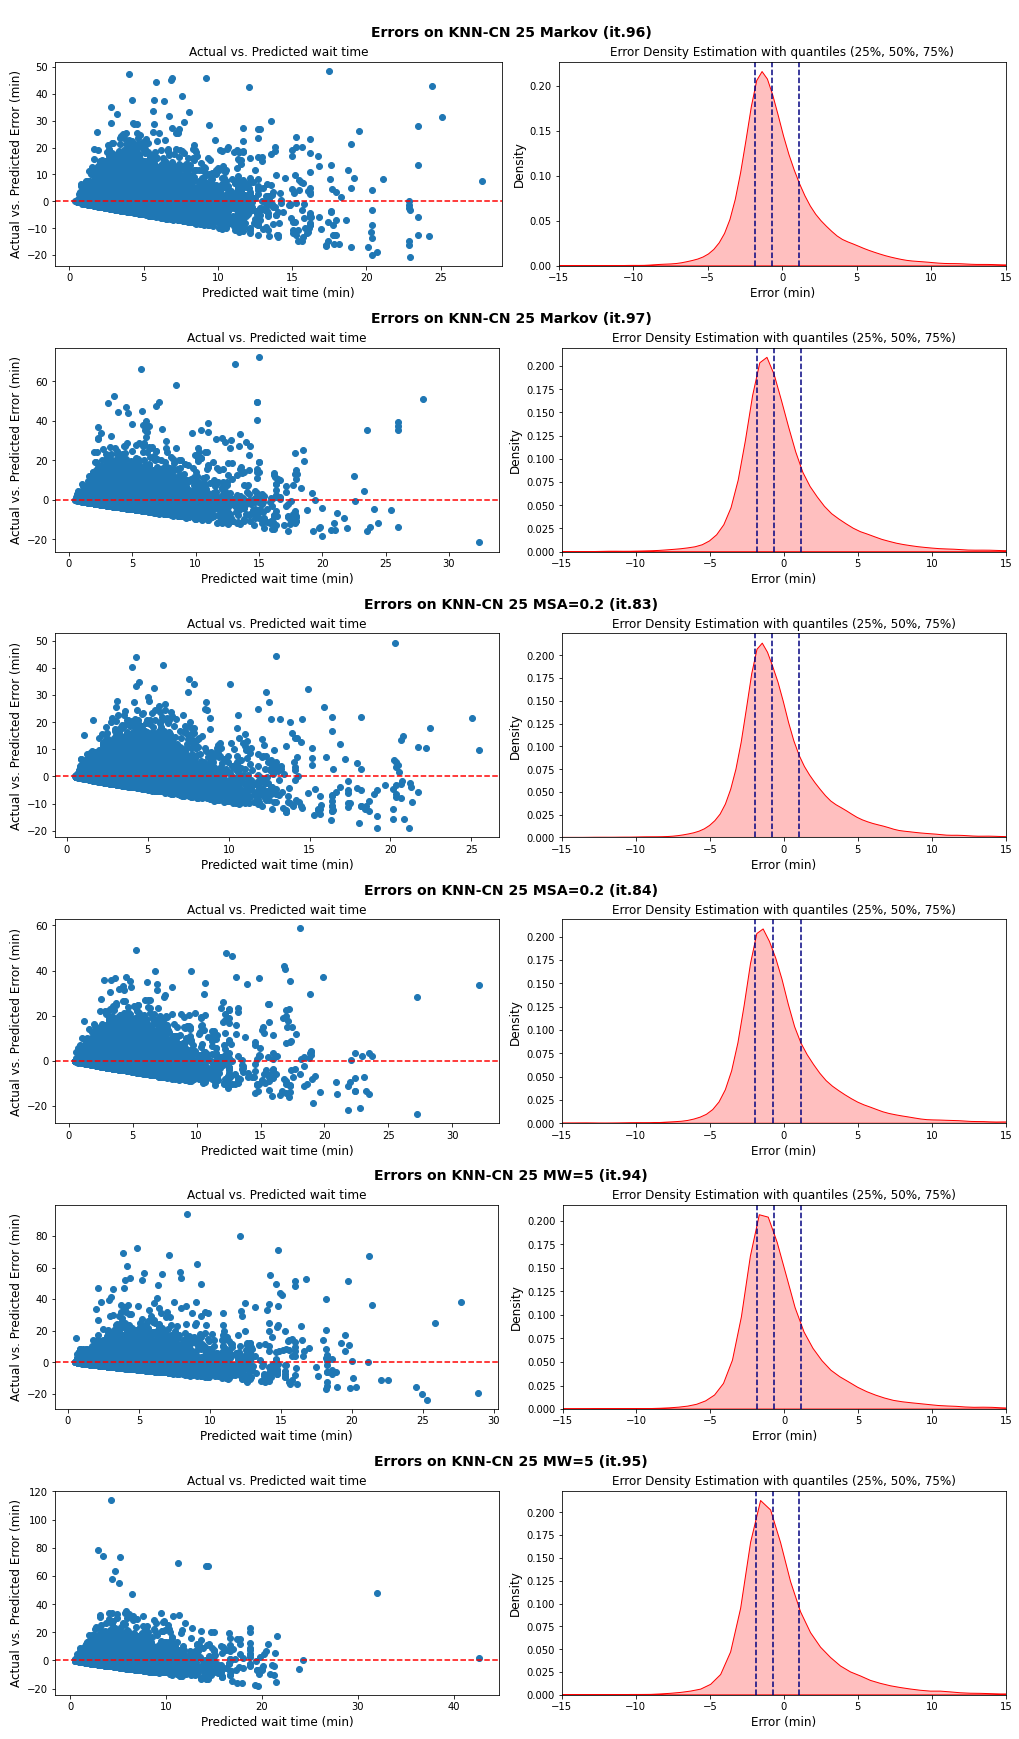

In [25]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods_smoothing, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

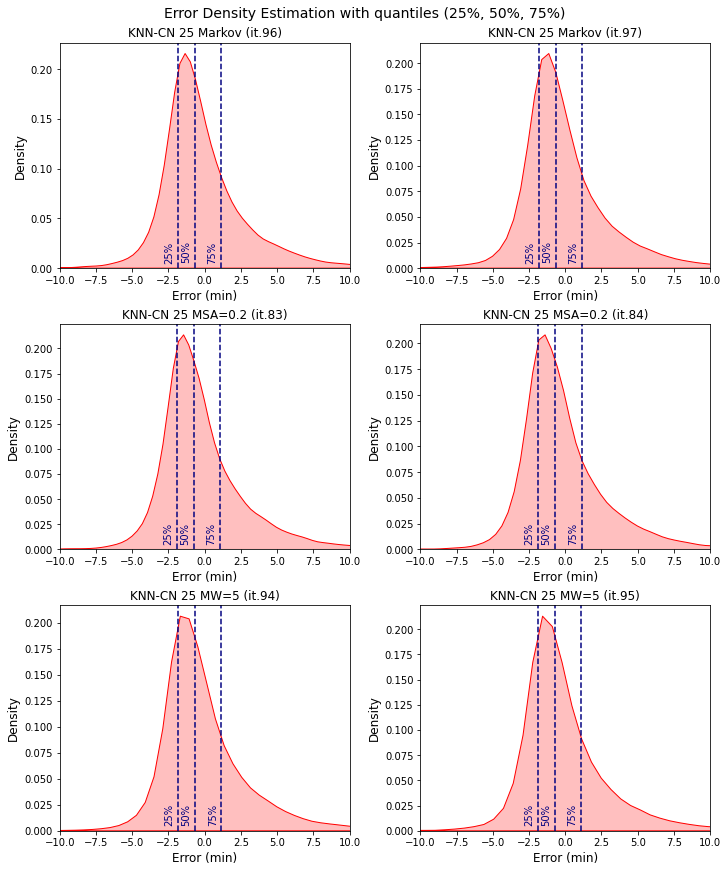

In [26]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods_smoothing, 'waitTime', 3,2, kde_plot_limit=10, add_iteration_to_title=True)

In [27]:
t = predictions_evaluations.get_confidence_intervals_table(
    compare_methods, 'waitTime', add_iteration_to_title=True,
    confidence_intervals=[1,2,3,4,5,7.5,10])
t

,% trips with abs error < 1,% trips with abs error < 2,% trips with abs error < 3,% trips with abs error < 4,% trips with abs error < 5,% trips with abs error < 7.5,% trips with abs error < 10
Fixed feedback (it.100),2.685106,5.617021,8.876596,12.838298,17.936170,41.242553,98.829787
Global feedback (it.89),16.102353,35.757793,57.664517,85.990684,89.072017,92.959513,95.252598
Square 850m (it.93),30.526869,59.796371,78.475990,87.257133,91.787736,96.639244,98.272945
Hex 500m (it.85),30.713801,58.955731,78.199108,86.925962,91.485780,96.450193,98.160125
KNN-CN 10 (it.88),32.343021,60.216441,77.596269,86.359504,91.069596,96.087632,97.885444
KNN-CN 25 (it.97),30.672643,60.036215,78.262289,86.642128,91.160057,96.283543,98.097245
KNN-CN 50 (it.67),27.239833,55.995813,76.635766,86.366627,91.121411,96.300837,98.133971
KNN-CN 100 (it.90),28.432961,58.662693,78.655749,87.570164,91.944911,96.600312,98.258203
"KNN-PN 0.1, 1000 (it.93)",27.930701,57.916337,78.483276,87.136869,91.343476,96.362091,98.103362
"KNN-PN 0.2, 1000 (it.75)",26.238478,54.927148,77.151353,86.598275,91.296461,96.286054,98.093964


In [28]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("CN 25 markov", data['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("CN 25 MSA = 0.2", data['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("CN 25 MW = 5", data['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]


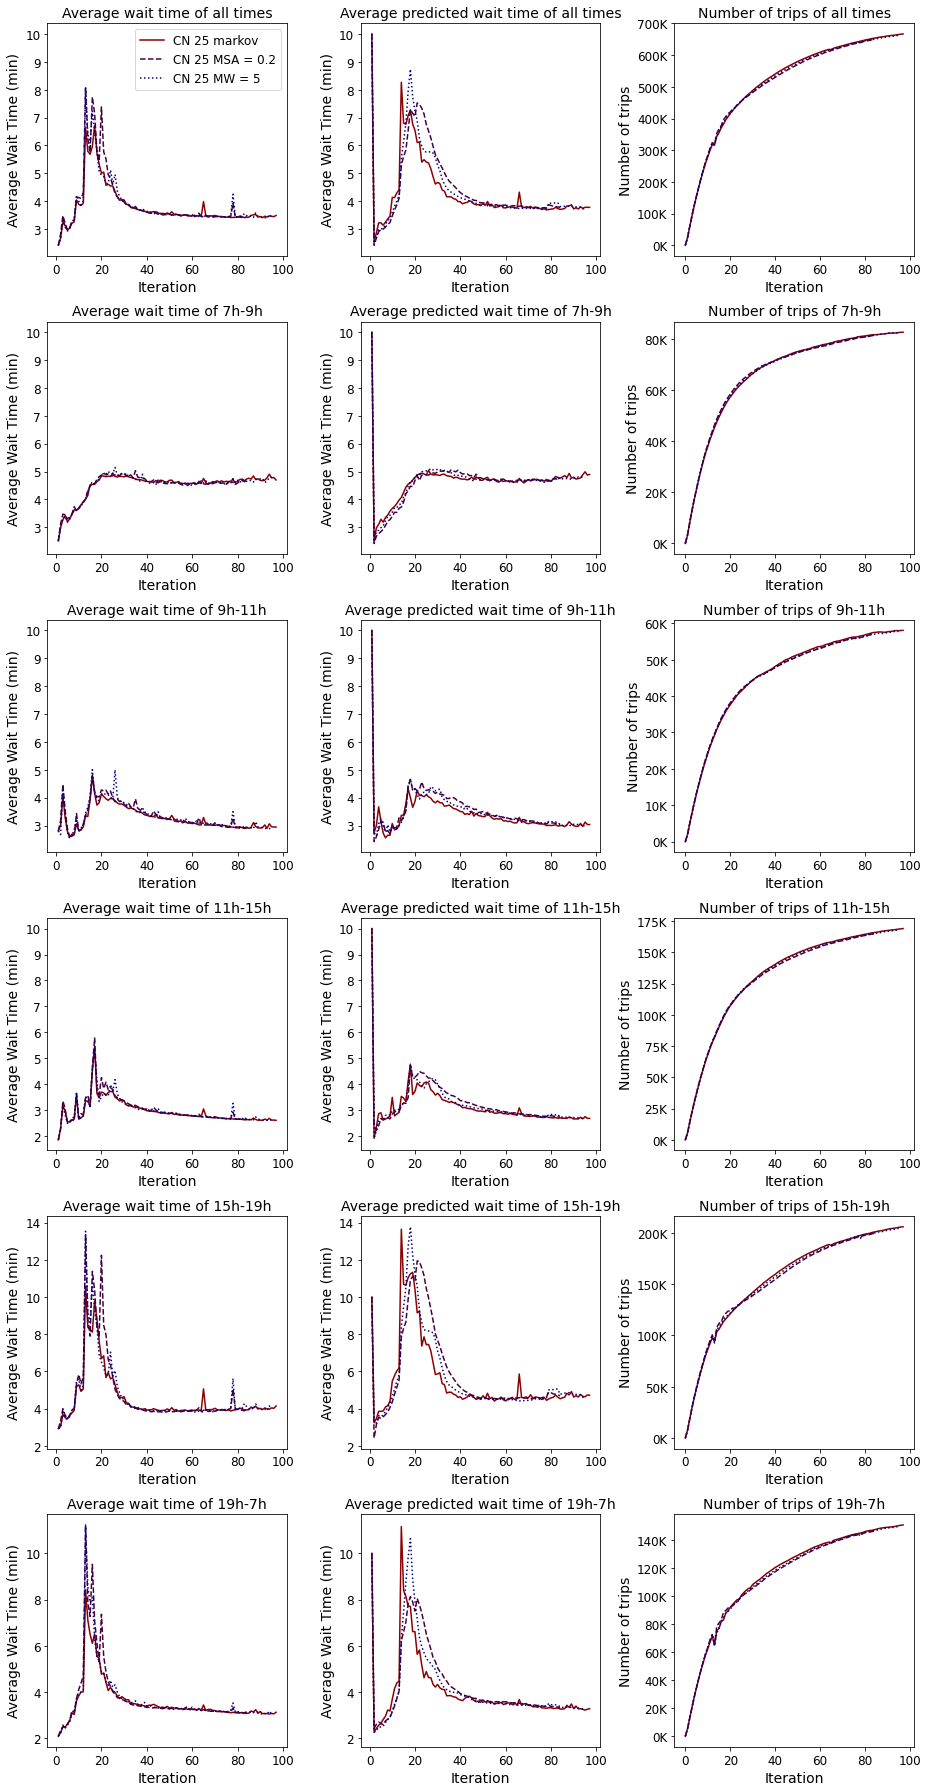

In [29]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)